# PFRA 

### _Development Notebook_
--- 

### QA/QC
#### Global Errors Check

This notebook is intended to identify global issues in a model simulation that require follow-up responses from the modeler before the model can be used in *STARRII* PFRA studies.

Global issues currently implemented include:
 
 __1. Check Model inputs__
 
    A. Plan Information
    B. Plan Parameters
    C. Boundary Conditions 
     
__2. Check Results for each domain (2D Flow Area) in the model__
 
    A. Computational Summary & Depth Plots
    B. Domain Extents
    C. High Velocities at cell faces
 
 
Global issues *in development* include:
 - Mapping areas where Courant number exceeds indicated threshold.
 - Mapping areas where iteration counts exceed indicated threshold.

In [1]:
import sys;sys.path.append('../')

In [2]:
import gdal
from hecrasio.core import ResultsZip
from hecrasio.qaqc import *
import scrapbook as sb

#### Read model output data 

*from AWS*

In [3]:
#! pip install nteract-scrapbook

In [4]:
# HDF testing
model_s3path = "s3://azavea/jwx_test/data/zip/atkinstest_P01_H00.p01.hdf"
model = ResultsZip(model_s3path, pfra=False, require_prj=False)
hdfResults_path = model.contents

In [5]:
# # Known to work
# model_s3path = "s3://azavea/jwx_test/data/zip/DC_F01_B01_out.zip"
# model = ResultsZip(model_s3path, require_prj=False)
# hdfResults_paths = [f for f in model.contents if '.hdf' in f]
# assert len([f for f in model.contents if '.hdf' in f]) == 1, "Check files...too many hdf's found"
# hdfResults_path = hdfResults_paths[0]
# hdfResults_path

In [6]:
rasPlan = HDFResultsFile(model, hdfResults_path)

Single domain found...


### 1A. Plan Information

In [7]:
sb.glue(rasPlan.Plan_Information.to_json(), "json")
rasPlan.Plan_Information

,Results
Base Output Interval,1HOUR
Computation Time Step Base,1MIN
Flow Filename,atkinstest_P01_H00.u01
Flow Title,pluvial
Geometry Filename,atkinstest_P01_H00.g01
Geometry Title,D01
Plan Filename,atkinstest_P01_H00.p01
Plan Name,Dev1
Plan ShortID,Dev1
Plan Title,Dev1


### 1B. Plan Parameters

In [8]:
sb.glue(rasPlan.Plan_Parameters.to_json(), "json")
rasPlan.Plan_Parameters

,Results
1D Cores,0
1D Methodology,Finite Difference
1D2D Flow Tolerance,0.1
1D2D MaxIter,0
1D2D Minimum Flow Tolerance,1
1D2D WS Tolerance,0.01
2D Boundary Condition Ramp Up Fraction,[0.1]
2D Boundary Condition Volume Check,[b'False']
2D Cores,0
2D Coriolis,False


### 1C. Boundary Conditions 

#### Input hydrographs

In [9]:
# def velCheckMain_local(results, domain, plot_tseries=5):
#     """
#     Add Description
#     :param results:
#     :param plot_tseries:
#     :param domain:
#     """
#     # Identify face velocities above a given threshold
#     df_thresh = results.find_anomalous_attributes()
#     df_count = results.count_anomalous_attributes()

#     if df_count.shape[0] > 1 and df_thresh.shape[0] > 1:

#         # Identify groups of excessive centroids
#         gdf_groups = group_excessive_points(df_thresh, results.CellSize)

#         # Using a method nearly doubles the time
#         max_list, count_list, face_list = subset_data(gdf_groups, df_thresh, df_count, results.Faces)

#         # Split groups into large (n > 5) clusters vs. everything else
#         l_dict, s_dict = find_large_and_small_groups(count_list, max_list, face_list, gdf_groups)

#         # Identify group of interest
#         for idx in range(len(l_dict['groups'])):
#             plot_instabilities(l_dict['maxes'], l_dict['counts'], l_dict['faces'], results.Perimeter,
#                                l_dict['groups'], idx)

#             # NOT USED?
#             maxes = l_dict['maxes'][idx]
#             # counts = l_dict['counts'][idx]
#             # faces = l_dict['faces'][idx]
#             # group = l_dict['groups'][idx]

#             max_vFaceIDs = list(maxes.sort_values(by='max', ascending=False)[0:plot_tseries].index)

#             # NOT USED?
#             # groupID = idx
#             depths = results.Avg_Face_Depth.iloc[max_vFaceIDs]
#             velocities = results.Face_Velocity.iloc[max_vFaceIDs]

#             for i in depths.index:
#                 DepthVelPlot(depths.loc[i], velocities.loc[i], i)
        
        
        
#         plot_disparate_instabilities(s_dict['maxes'], s_dict['counts'], results.Perimeter, domain)
        
#         return pd.DataFrame(data=[len(pd.concat(count_list)), max(pd.concat(max_list)['max'])],
#                             columns=['Results'],
#                             index=['Instability Count', 'Max Velocity'])
#     else:
#         max_vel = result.Face_Velocity.values.max()
#         return pd.DataFrame(data=[0, max_vel],
#                             columns=['Results'],
#                             index=['Instability Count', 'Max Velocity'])
#         print('No Velocity Errors Found in Domain {}'.format(domain))

# def show_results_local(domains:list, model, rasPlan, plot_tseries:int=3) -> None:
#     """Wrapper function plotting descriptive statistics, extreme edges, boundary
#     conditions and velocity values.
#     """
#     if len(domains) > 1:
#         results = {domain: DomainResults(model, rasPlan, domain) for domain in domains}
#         for domain, result in results.items():
#             plot_descriptive_stats(result.Describe_Depths, result.Perimeter, domain)
#             plot_extreme_edges(result.Extreme_Edges, result.Perimeter, mini_map=rasPlan.domain_polys)
#             plotBCs(result, domain) 
#             return velCheckMain_local(result, domain, plot_tseries)

#     else:
#         # All before return should be fine
#         domain = domains[0]
#         result = DomainResults(model, rasPlan, domain)
#         plot_descriptive_stats(result.Describe_Depths, result.Perimeter, domain)
#         plot_extreme_edges(result.Extreme_Edges, result.Perimeter)
#         plotBCs(result, domain)
#         return velCheckMain_local(result, domain, plot_tseries)

In [10]:
# result = DomainResults(model, rasPlan, rasPlan.domains[0])

/home/jwall/anaconda3/envs/geos/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


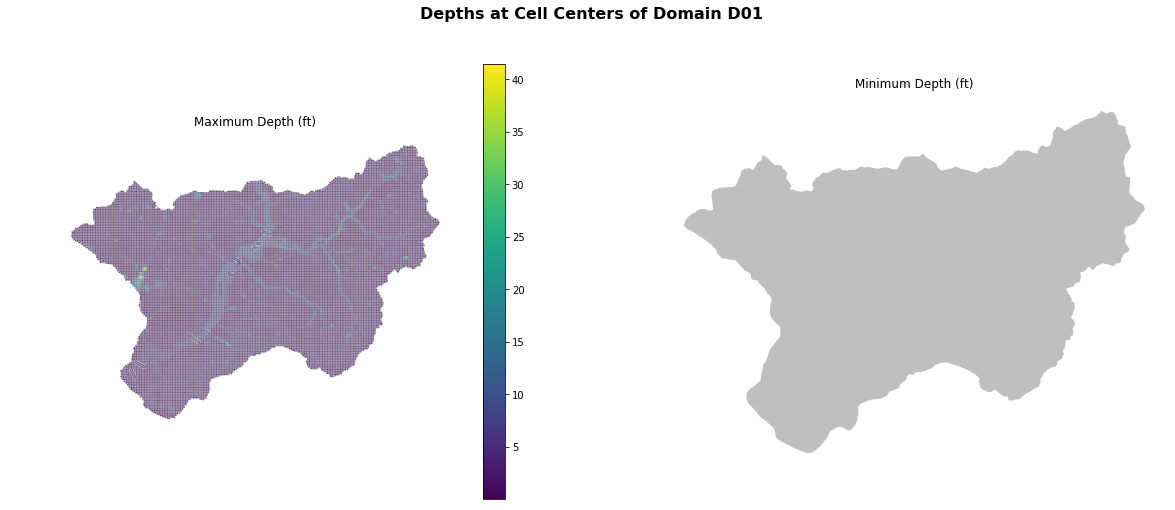

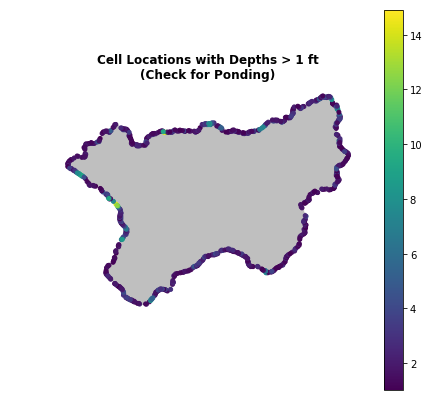

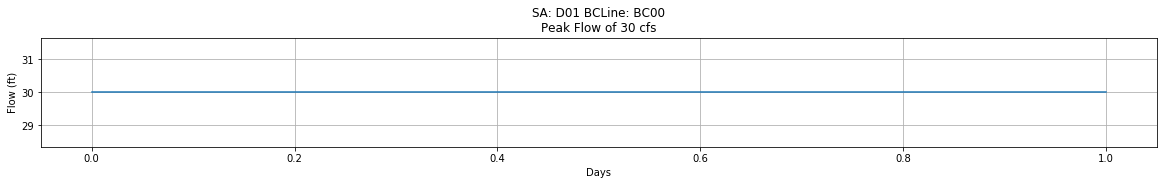

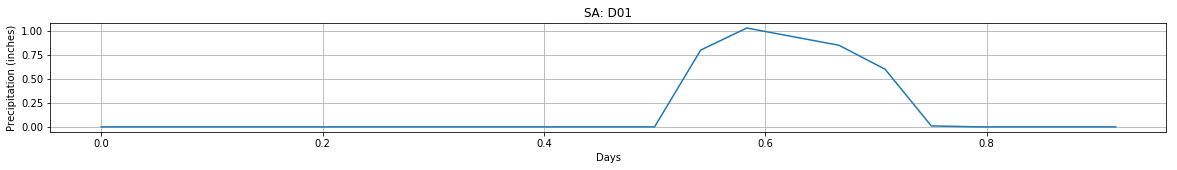

In [11]:
results_data = show_results(rasPlan.domains, model, rasPlan)
sb.glue(results_data.to_json(), "json")

### 2A. Computational Summary

In [13]:
non_nan = rasPlan.summary.replace(np.nan, "00:00:00")
sb.glue(non_nan.to_json(), "json")
rasPlan.summary

,Results
Computation Time DSS,00:00:00
Computation Time Total,00:00:50
Maximum WSEL Error,0
Run Time Window,08JUN2019 07:43:44 to 08JUN2019 07:44:34
Solution,Unsteady Finished Successfully
Time Solution Went Unstable,NaN
Time Stamp Solution Went Unstable,Not Applicable
Vol Accounting,Volume Accounting in Acre Feet
Vol Accounting 2D Bdry,0
Vol Accounting Cell End,8893.06


# END